# Introduction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import statsmodels.api as sm
import scipy.stats as stats
import pylab 
from mpl_toolkits.axisartist.axislines import Subplot  

In [2]:
df = pd.read_csv("StartupData.csv")

In [4]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


# Descriptive Statistics

Let us try to understand the given dataset in terms of the number of rows and columns

In [5]:
df.loc[:,['Internet Activity Score','Employee Count','Dependent-Company Status']]

,Internet Activity Score,Employee Count,Dependent-Company Status
0,-1.0,3.0,Success
1,125.0,NaN,Success
2,455.0,14.0,Success
3,-99.0,45.0,Success
4,496.0,39.0,Success
...,...,...,...
467,-5.0,NaN,Failed
468,NaN,NaN,Failed
469,0.0,0.0,Failed
470,0.0,NaN,Failed


In [6]:
df.corr()['Internet Activity Score']

Internet Activity Score        1.000000
Employee Count                 0.100511
Employees count MoM change     0.141396
Last Funding Amount            0.029657
Number of Co-founders          0.139881
Number of of advisors          0.089105
Team size Senior leadership    0.105978
Industry trend in investing    0.041369
Name: Internet Activity Score, dtype: float64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB
None


As there are 116 columns used to describe the startup, let us find out how many of them can be used as is 

In [8]:
l = df.isna().sum().index
for i in l :
    if df.isna().sum()[i]>0:
        print(i,df.isna().sum()[i])

Age of company in years 44
Internet Activity Score 65
Short Description of company profile 149
Industry of company 124
Focus functions of company 30
Investors 140
Employee Count 166
Employees count MoM change 205
Has the team size grown 50
Est. Founding Date 109
Last Funding Date 122
Last Funding Amount 160
Country of company 71
Continent of company 71
Specialization of highest education 97
Industry trend in investing 82
Gartner hype cycle stage 172
Time to maturity of technology (in years) 172


In [9]:
df.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,390.000000
mean,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,2.889744
std,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.845765
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,2.000000
50%,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,3.000000
75%,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,3.000000
max,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


# Visualisations

### Let us see the number of Startups that have either succeeded or failed: 

In [10]:
df['Dependent-Company Status'].value_counts()

Success    305
Failed     167
Name: Dependent-Company Status, dtype: int64

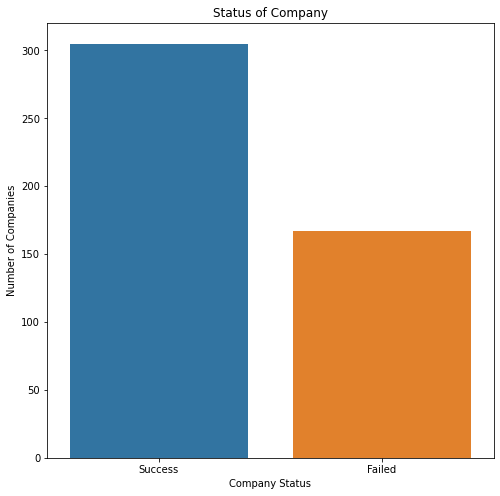

In [11]:
fig, ax = plt.subplots()
sns.countplot(x='Dependent-Company Status',data=df)
fig.set_size_inches(8,8)
plt.title("Status of Company")
plt.xlabel("Company Status")
plt.ylabel("Number of Companies")
plt.show()

### Let us see the distribution of companies among the classes

In [12]:
success_df = df[df['Dependent-Company Status']=="Success"]
failed_df = df[df['Dependent-Company Status']=="Failed"]


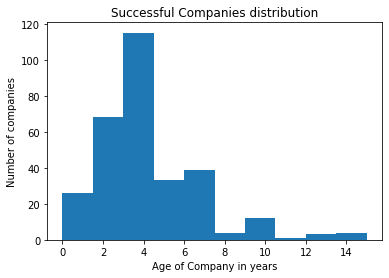

In [13]:
#SUCCESSFUL COMPANIES DISTRIBUTION, WITH AGE OF COMPANY ON X AXIS

plt.hist(success_df['Age of company in years'].replace(to_replace=['No Info',np.nan],value="0").astype(int))
plt.xlabel("Age of Company in years")
plt.ylabel("Number of companies")
plt.title("Successful Companies distribution")
plt.show()

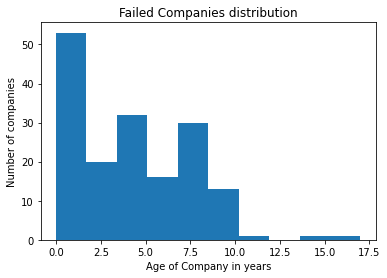

In [14]:
#FAILED COMPANIES DISTRIBUTION

plt.hist(failed_df['Age of company in years'].replace(to_replace=['No Info',np.nan],value="0").astype(int))
plt.xlabel("Age of Company in years")
plt.ylabel("Number of companies")
plt.title("Failed Companies distribution")
plt.show()

From the figures, it is clear that most of the startups call it quits less than a year into operation
whereas the most number of startups have been in operation for around 4 years

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



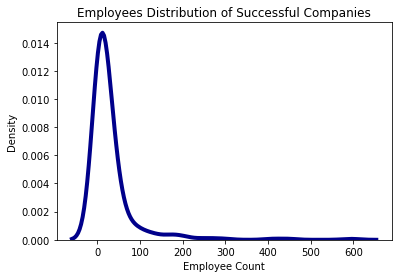

In [15]:
#EMPLOYEES DISTRIBUTION OF SUCCESSFUL COMPANIES

sns.distplot(df['Employee Count'], hist=False, kde=True, bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
plt.title("Employees Distribution of Successful Companies")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



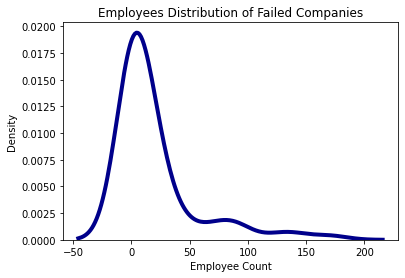

In [16]:
#EMPLOYEE DISTRIBUTION FOR FAILED COMPANIES

sns.distplot(failed_df['Employee Count'], hist=False, kde=True, bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
plt.title("Employees Distribution of Failed Companies")
plt.show()

In [17]:
failed_df.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,123.000000,70.000000,58.000000,9.400000e+01,167.000000,167.000000,167.000000,87.000000
mean,2.300813,19.857143,-13.862069,6.870266e+06,1.550898,0.502994,2.862275,2.839080
std,128.618507,35.541886,37.748219,1.253657e+07,1.154659,1.171315,2.449284,0.713223
min,-535.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,2.000000
25%,-24.000000,1.000000,-3.500000,6.650000e+05,1.000000,0.000000,1.000000,2.000000
50%,0.000000,3.500000,0.000000,2.400000e+06,1.000000,0.000000,2.000000,3.000000
75%,15.000000,19.750000,1.750000,7.000000e+06,2.000000,1.000000,3.000000,3.000000
max,516.000000,170.000000,33.000000,7.700000e+07,6.000000,10.000000,24.000000,4.000000


In [18]:
success_df.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,284.000000,236.000000,209.000000,2.180000e+02,305.000000,305.000000,305.000000,303.000000
mean,162.605634,34.834746,2.186603,6.167870e+06,2.042623,1.298361,4.206557,2.904290
std,241.089604,68.378190,16.967407,8.544352e+06,1.100906,2.305492,2.427899,0.880669
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,21.250000,6.000000,0.000000,7.500000e+05,2.000000,0.000000,2.000000,2.000000
50%,115.000000,14.000000,0.000000,2.835445e+06,2.000000,0.000000,4.000000,3.000000
75%,278.750000,33.250000,7.000000,8.000000e+06,3.000000,2.000000,6.000000,4.000000
max,1535.000000,594.000000,50.000000,4.500000e+07,7.000000,13.000000,14.000000,5.000000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



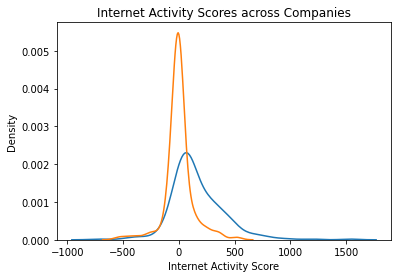

In [19]:
#COMPARISION OF INTERNET ACTIVITY SCORES OF COMPANIES

status = ['Success','Failed']

for i in status:
    # Subset to the airline
    subset = df[df['Dependent-Company Status'] == i]
    
    # Draw the density plot
    sns.distplot(subset['Internet Activity Score'], hist = False, 
                 label = i)
plt.title("Internet Activity Scores across Companies")    
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



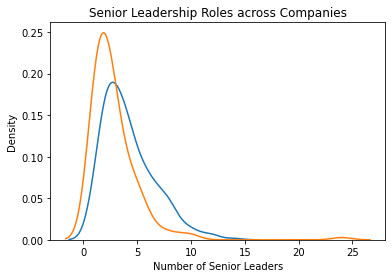

In [20]:
#COMPARING SENIOR LEADERSHIP ROLES ACCROSS COMPANIES

status=['Success',"Failed"]
for i in status:
    subset = df[df['Dependent-Company Status'] == i]
    sns.distplot(subset['Team size Senior leadership'], hist = False,
                 label = i)
plt.xlabel("Number of Senior Leaders")
plt.title("Senior Leadership Roles across Companies")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



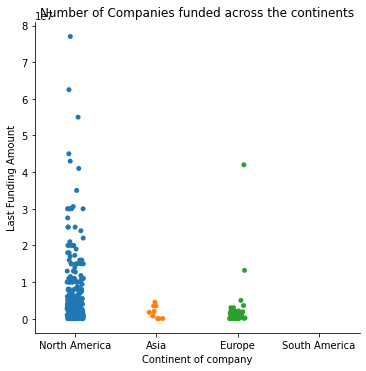

North America    308
Europe            76
Asia              15
South America      2
Name: Continent of company, dtype: int64

In [21]:
#DISTIRBUTION OF COMPANIES ACROSS CONTINENTS

sns.catplot("Continent of company","Last Funding Amount", data = df)
plt.title("Number of Companies funded across the continents")
plt.show()
df["Continent of company"].value_counts()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



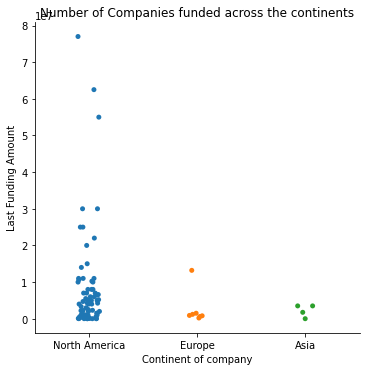

In [22]:
#FUNDED COMPANIES ACROSS CONTINENTS

sns.catplot("Continent of company","Last Funding Amount", data = df[df["Dependent-Company Status"]=="Failed"])
plt.title("Number of Companies funded across the continents")
plt.show()

<Figure size 288x360 with 0 Axes>

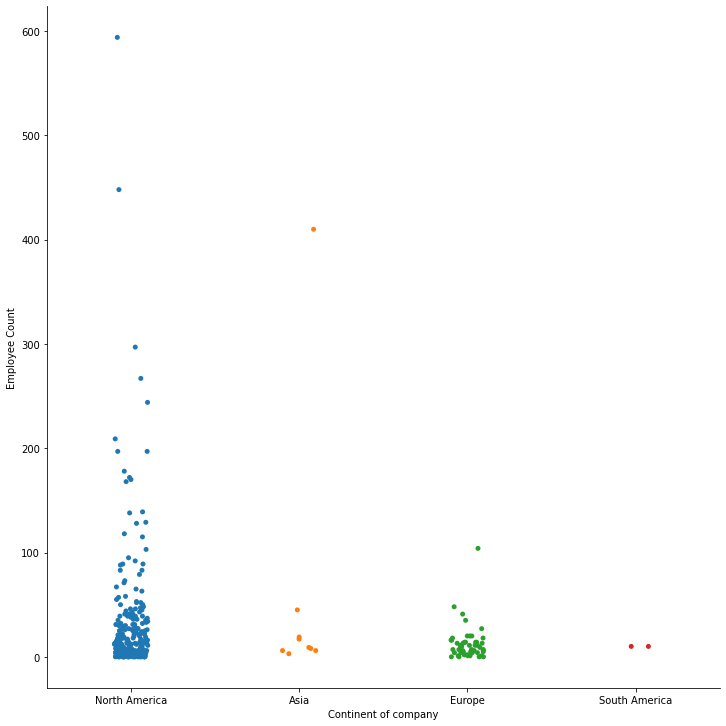

In [23]:
fig = plt.figure()  
ax = Subplot(fig, 111)  
# fig.add_subplot(ax)     
fig.set_size_inches(4, 5)
sns.catplot(x="Continent of company", y="Employee Count", data=df, height=10)
plt.show()

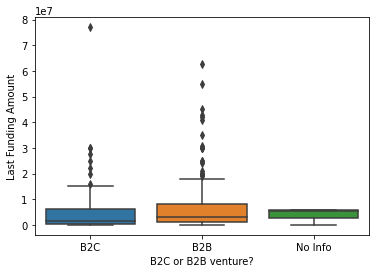

In [24]:
#TYPE OF VENTURE

sns.boxplot(x="B2C or B2B venture?", y="Last Funding Amount", data=df)
plt.show()

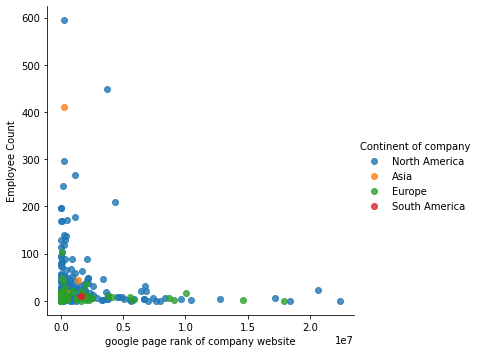

In [25]:
#GOOGLE PAGE RANK OF COMPANIES FROM DIFFERENT CONTINENTS

df['google page rank of company website']=df['google page rank of company website'].replace(to_replace=['No Info',np.nan],value="0").astype(int)
#need to dataclean 
sns.lmplot(data=df, x='google page rank of company website', y='Employee Count', hue="Continent of company",
                   fit_reg=False, legend=True, legend_out=True)

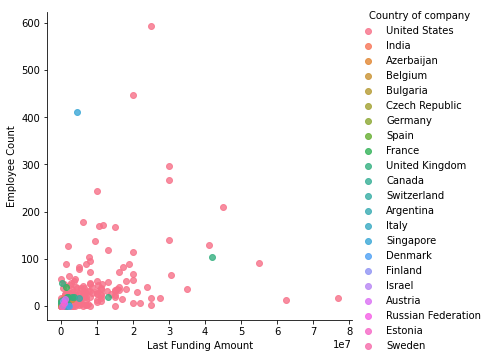

In [26]:
#DISTRIBUTION OF COMPANIES ACCORDING TO COUNTRY

sns.lmplot(data=df, x='Last Funding Amount', y='Employee Count', hue="Country of company", 
                   fit_reg=False, legend=True, legend_out=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



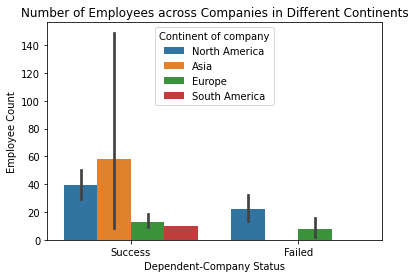

In [27]:
#NUMBER OF EMPLOYEES IN COMPANIES SORTED BY CONTINENT

sns.barplot("Dependent-Company Status","Employee Count",hue="Continent of company",data=df)
plt.title("Number of Employees across Companies in Different Continents")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Dependent-Company Status', ylabel='Age of company in years'>

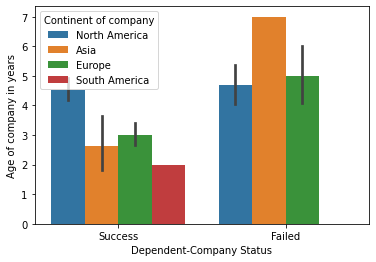

In [28]:
#AGE OF COMPANIES FAILED OR SUCCESSFUL SORTED BY CONTINENTS

df['Age of company in years']=df['Age of company in years'].replace(to_replace=['No Info',np.nan],value="0").astype(int)
sns.barplot("Dependent-Company Status","Age of company in years",hue="Continent of company",data=df)

In [29]:
def number_of_industries(row):
    if type(row)==float:
        return 0
    else:
        return len(row.split("|"))

In [30]:
df["Number of Industries"] = df['Industry of company'].apply(number_of_industries)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Number ')

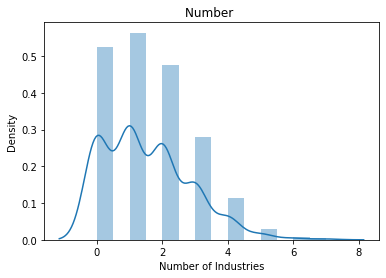

In [31]:
#KERNEL DENSITY ESTIMATION

sns.distplot(df['Number of Industries'],kde=True)
plt.title("Number ")

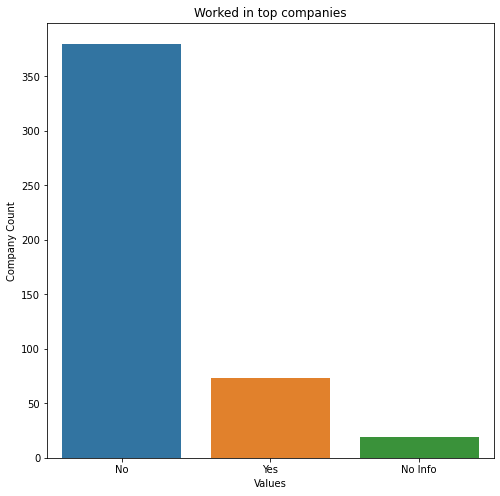

In [32]:
#THE KIND OF COMPANIES EMPLOYEES WORKED FOR

fig, ax = plt.subplots()
sns.countplot(x='Worked in top companies',data=df)
fig.set_size_inches(8,8)
plt.title("Worked in top companies")
plt.xlabel("Values")
plt.ylabel("Company Count")
plt.show()

In [33]:
df["Experience in Fortune 100 organizations"].value_counts()

0          285
1          105
No Info     82
Name: Experience in Fortune 100 organizations, dtype: int64

In [34]:
df["Experience in Fortune 1000 organizations"].describe()

count     472
unique      3
top         0
freq      305
Name: Experience in Fortune 1000 organizations, dtype: object

## Test for Normality

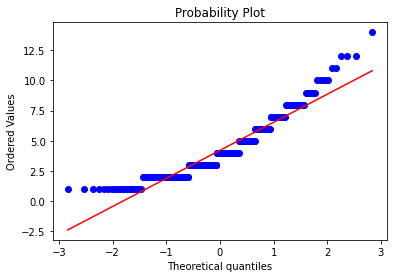

In [35]:
stats.probplot(success_df['Team size Senior leadership'], dist="norm", plot=pylab)
pylab.show()